In [ ]:
# iris 데이터 분류
# 1. 머신러닝과 어떤점이 달랐는가
# 2. 딥러닝에서는 어떤곳에 집중하는가

In [ ]:
# 2. 데이터 수집
# 기존에 정리되어있던 자료 가져오기
from sklearn.datasets import load_iris
data = load_iris()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# 3. 데이터 전처리
X=data['data'] # 문제
y=data['target'] # 정답

In [ ]:
# 결측치, 이상치
# 4. 탐색적 데이터 분석

In [ ]:
# 5. 모델 선택 및 하이퍼 파라미터 튜닝
# 5. 모델 설계 및 학습 방법 설정 > 딥러닝
# 데이터 나누기
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
X_train.shape

(105, 4)

In [ ]:
# 5-1 모델 설계
from tensorflow.keras import Sequential # 딥러닝 모델의 뼈대
from tensorflow.keras.layers import InputLayer, Dense # 하나의 층의 디자인
# inputLayer : 데이터를 받아오는 역할, 데이터의 형태 지정
# Dense : 데이터를 분석 

#DNN(Deep neaural network)
#MLP(Multi Layer Perceptron) >inputLayer와 Dense만 사용
110368058394
model=Sequential()
# 입력층
model.add(InputLayer(input_shape=(4,))) # 하나씩의 데이터를 입력 받음
# 전체 몇개의 데이터가 들어오는지는 몰라도됨
# 한번에 몇개가 들어오는지는 알아야함 > 붓꽃 데이터의 특성(꽃잎 길이, 꽃잎 넓이, 꽃받침 길이, 꽃받침 넓이)
# 중간층(2개층)
model.add(Dense(units= 32, activation='relu')) 
# units : 퍼셉트론의 숫자(생각하는 방법의 수)
# activation : 다음층에 값을 전달하는 방법 
model.add(Dense(units= 32, activation='relu')) 
# 출력층
# units : 퍼셉트론의 숫자(생각하는 방법의 수)> 출력해야하는 정답의 종류
# activation : 다음층에 값을 전달하는 방법 > 마지막층은 값을 종합해서 결론 
model.add(Dense(units= 3, activation='softmax'))

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
# 6. 학습
# epochs = 100, 100번동안 발전하는 딥러닝 모델
history=model.fit(X_train,y_train, epochs=100)
# 전에 학습했떤 내용을 기억

Epoch 1/100
4/4 [==============================] - 9s 8ms/step - loss: 1.4479 - accuracy: 0.3524
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 1.2213 - accuracy: 0.3524
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0820 - accuracy: 0.3619
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9861 - accuracy: 0.3429
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9390 - accuracy: 0.5048
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8992 - accuracy: 0.6476
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8662 - accuracy: 0.6476
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8287 - accuracy: 0.6476
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7917 - accuracy: 0.6476
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7567 - accuracy: 0.6476
Epoch 11/100
4/4 [===========

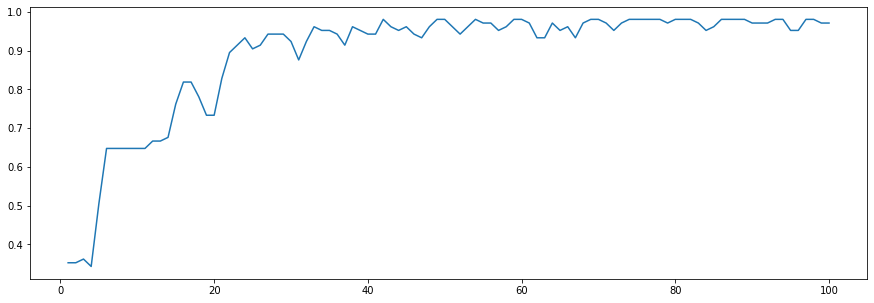

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(range(1,101),
         history.history['accuracy'],
         label='accuracy')
plt.show()

In [ ]:
model.predict(X_test[:1])

1/1 [==============================] - 0s 91ms/step


array([[1.1809777e-05, 5.7305209e-02, 9.4268298e-01]], dtype=float32)

In [ ]:

# 퍼셉트론의 동작원리
# 퍼셉트론 = 선형함수(정답을 찾는 방법) + 역치(activation)
# 다층 퍼셉트론(ANd게이트 or 게이트 xor게이트)

# activation 의 개념
# 다음층의 퍼셉트론에게 값을 전달하기 전에 거치는 단계
# 입력층을 제외한 층에서 사용
# 층마다 같은 활성화함수를 공유
# sigmoid, tanh, softmax, linear, maxout, relu ...
# 출력층에 사용하는 활성화함수
      # 1) sigmoid : 이진분류
      # 2) softmax : 다중분류
      # 3) linear:회귀
# 이진분류 - sigmoid : 입력값을 0~1까지로 변환



# 출력층이 다른층과 다른점
      # - 출력층은 결론을 내는 층이다
      - activation이 분석하는 종류에 따라 다르다
      units
      1) 이진분류 > 1개 대답 : units =1
      2)
# 이진분류,회귀,다중분류 마다 달라지는점
# compile(학습 방법 설정)
# 1) loss
# 2) optimizer
# 3) metrics